In [33]:
# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import statsmodels.distributions
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'
from scipy.stats import weibull_min 
import operator, re

def plotReliability(interarrivals):
    fig = plt.gcf()
    fig.set_size_inches(15.02,8)

    data = interarrivals
    count, bins_count = np.histogram(data, bins=len(interarrivals))
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    rel = []
    for pin in cdf:
        rel.append(1-pin)
    # plotting CDF e reliability nominale
    plt.plot(bins_count[1:], rel, color="red", label="Reliability")
    plt.legend()

def loadInterarrivals(filename):
    interarrivals = []
    with open(filename) as f:
        lines = f.readlines()
    for line in lines:
         interarrivals.append(int(line.rstrip()))
    return interarrivals

def plotFittingDiagrams(interarrivals):
    fig = plt.gcf()
    fig.set_size_inches(15.02,8)

    shape, loc, scale = weibull_min.fit(interarrivals, floc=0) 
    plt.hist(interarrivals, density=1, alpha=0.2)
    x = np.linspace(min(interarrivals), max(interarrivals), len(interarrivals))

    fitted_weib = scipy.stats.weibull_min(shape, loc, scale*38)
    fitted_logn = scipy.stats.lognorm(shape, loc, scale*1.75)
    fitted_exp = scipy.stats.expon(shape, scale*2.2)

    plt.plot(x, fitted_weib.pdf(x), label='Lognormale')
    plt.plot(x, fitted_logn.pdf(x), label='Esponenziale')
    plt.plot(x, fitted_exp.pdf(x), label='Weibull')
    plt.legend()
    plt.title("Distribuzione degli errori")
    plt.xlabel("Evoluzione nel tempo")

    scipy.stats.probplot(interarrivals, dist=fitted_logn, plot=plt.figure().add_subplot(111))
    plt.title("Plot quantile-quantile rispetto ad una Lognormal")

    scipy.stats.probplot(interarrivals, dist=fitted_exp, plot=plt.figure().add_subplot(111))
    plt.title("Plot quantile-quantile rispetto ad una Esponenziale")

    scipy.stats.probplot(interarrivals, dist=fitted_weib, plot=plt.figure().add_subplot(111))
    plt.title("Plot quantile-quantile rispetto ad una Weibull")
    
    
# calcolo dei nodi con maggior log nelle tuple
def getLeaderNodes(lenghts_filename='lenghts.txt', nodename_position=1, limit=5, forTuple=False):
    # forTuple calcola i leader nodes rispetto alla presenza nelle tuple 
    # e non sul numero di voci nella singola tupla
    # TBD
    nodes_dict = {}
    num_tuples = sum(1 for line in open(lenghts_filename))
    tuple_filename_prefix = 'tuple_'
    for i in range(1,num_tuples):
        filename = tuple_filename_prefix+str(i)
        file = open(filename, "r")
        file_lines = file.read().splitlines()
        for line in file_lines:
            words = line.split()
            nodename = words[nodename_position]
            if nodename in nodes_dict:
                nodes_dict[nodename]+=1
            else:
                nodes_dict[nodename] = 1
    sorted_d = dict( sorted(nodes_dict.items(), key=operator.itemgetter(1),reverse=True))
    limited_sorted_d = list(sorted_d.items())
    if limit > 0:
        limited_sorted_d = list(sorted_d.items())[:limit]
    return limited_sorted_d


def plotNumEntriesForNodes(nodes):
    node_name = []
    node_hits = []
    for node in nodes:
        node_name.append(node[0])
        node_hits.append(node[1])
    plt.bar(node_name, node_hits, align='center', alpha=0.5)
    plt.title("Numero di voci nel log per nodo")
    plt.ylabel("Hits")

# ritorna gli array, per i nodi passati, del numero di entry per tupla
def getSeriesForKeys(keys,lenghts_filename='lenghts.txt'):
    nodes_dict = {}
    for node in keys:
        nodes_dict[node] = []
    num_tuples = sum(1 for line in open(lenghts_filename))
    tuple_filename_prefix = 'tuple_'
    for i in range(1,num_tuples+1):
        filename = tuple_filename_prefix+str(i)
        file = open(filename, "r")
        data = file.read()
        for node in keys:
            occurrences = len(re.findall(node, data))
            nodes_dict[node].append(occurrences)
    return nodes_dict  

def getTupleFilesSerie(lenghts_filename = 'lenghts.txt'):
    x_arr = []
    num_tuples = sum(1 for line in open(lenghts_filename))
    tuple_filename_prefix = 'tuple_'
    for i in range(1,num_tuples+1):
        x_arr.append(tuple_filename_prefix+str(i))
    return x_arr

def plotHitsForTuplesAndNodes(nodes, start_tuple = False, stop_tuple = False, scale_x=100):
    leader_names = []
    for leader_node_dict in nodes:
        if isinstance(leader_node_dict, str):
            leader_names.append(leader_node_dict)
        else:
            leader_names.append(leader_node_dict[0])
    leader_series_dict = getSeriesForKeys(leader_names)
    fig = plt.gcf()
    fig.set_size_inches(15.02,8)
    
    x_array = getTupleFilesSerie()
    start = 1
    stop = len(x_array)+1
    if start_tuple:
        start = start_tuple
    if stop_tuple:
        stop = stop_tuple
        
    for leader_name in leader_names:
        plt.plot(x_array[start:stop], leader_series_dict[leader_name][start:stop], label = leader_name)

    # Set the y axis label of the current axis.
    plt.ylabel('Hits')
    plt.xticks(np.arange(0, len(x_array[start:stop])+1, scale_x))

    # Set a title of the current axes.
    plt.title('Hits per tupla relative a nodi o categorie')
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    plt.show()
    
def plotScatterForTwoSeries(serie_x,serie_y,label_x = False,label_y = False):
    fig = plt.gcf()
    fig.set_size_inches(15.02,8)
    plt.figure()
    plt.scatter(np.sort(serie_x), np.sort(serie_y))
    if label_x:
        plt.xlabel(label_x)
    if label_y:
        plt.ylabel(label_y)
    plt.show()
    plt.close()

    


In [10]:
interarrivals = loadInterarrivals('interarrivals.txt')

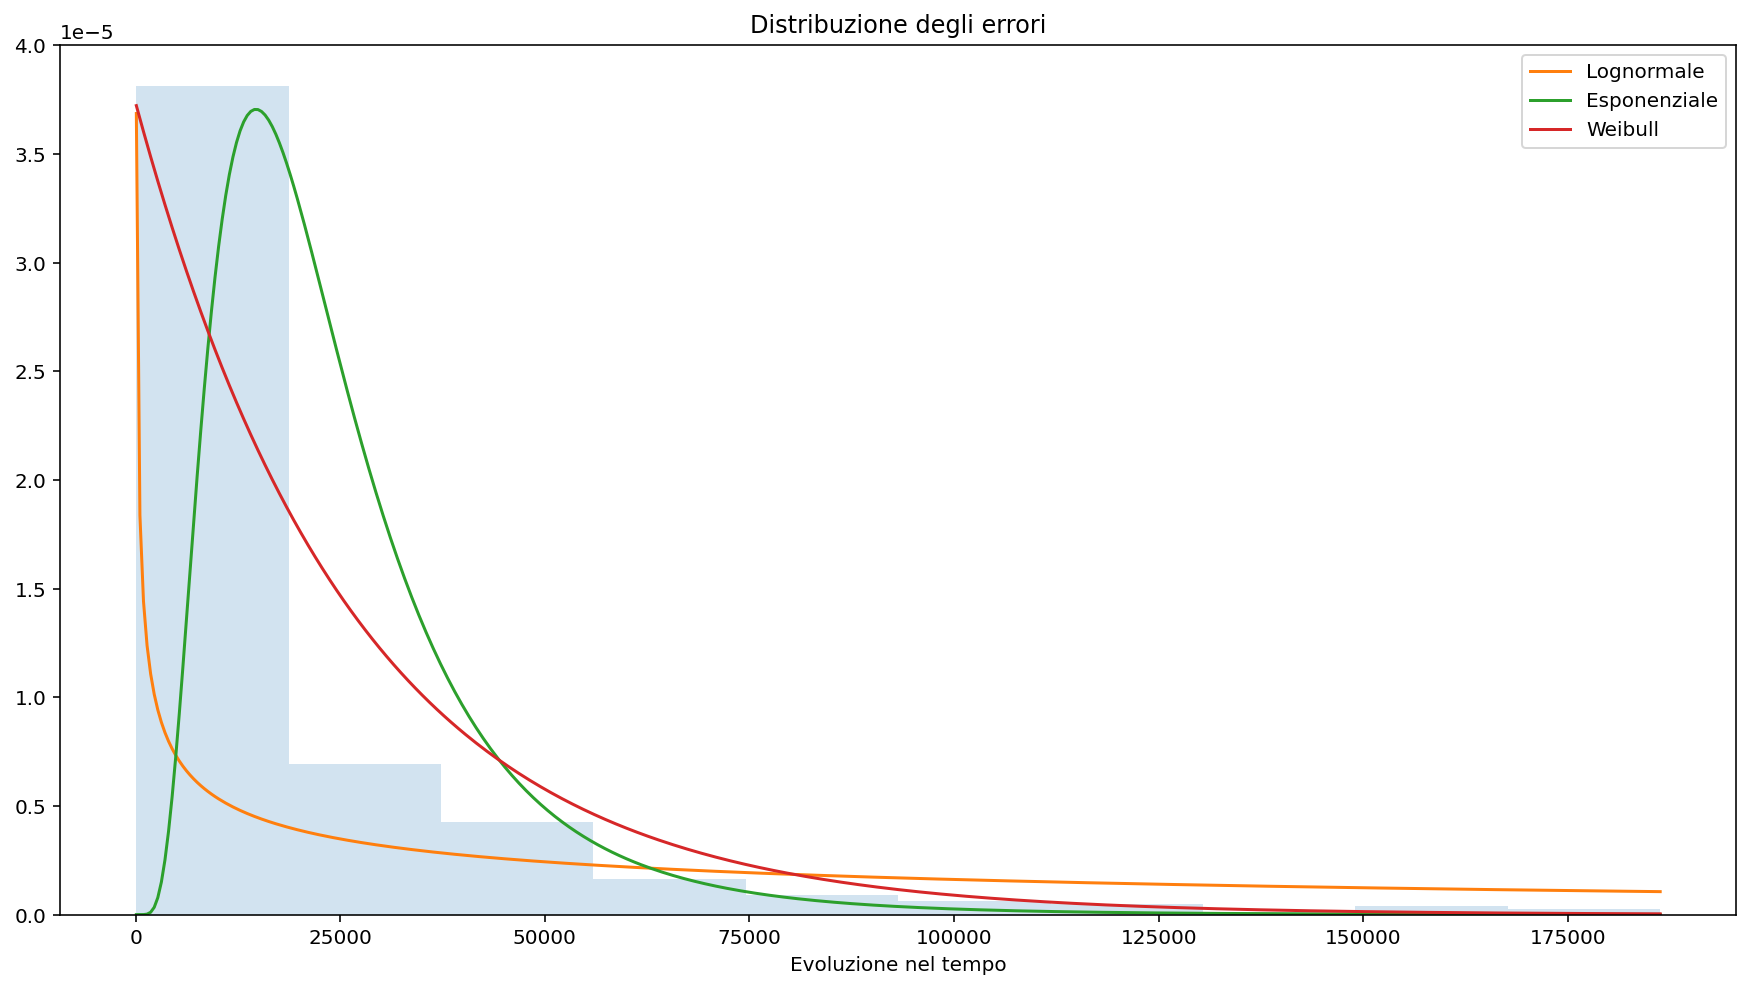

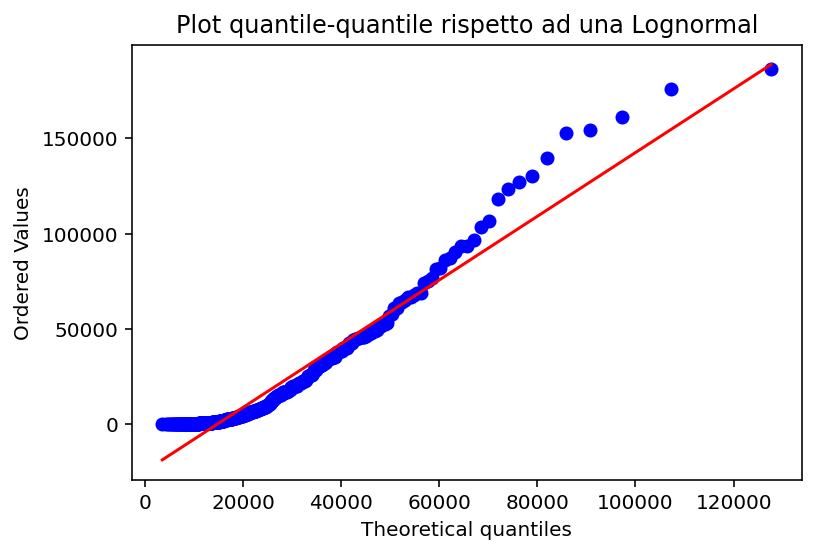

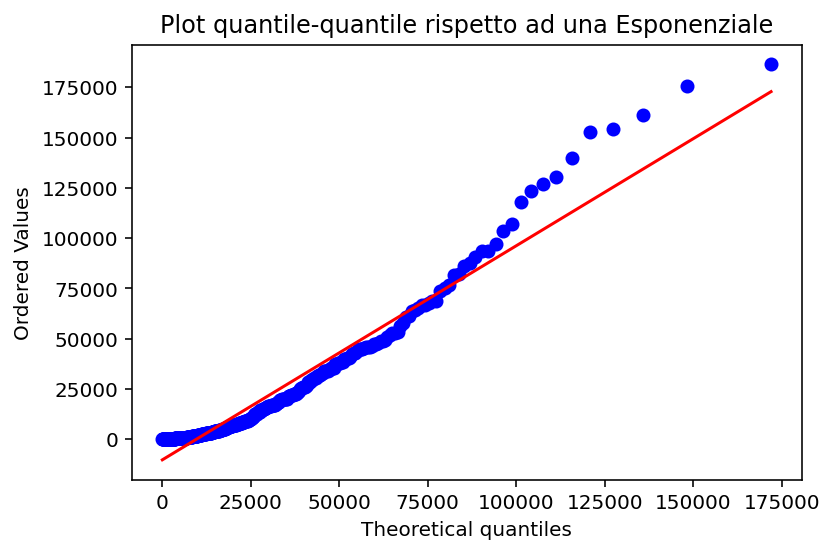

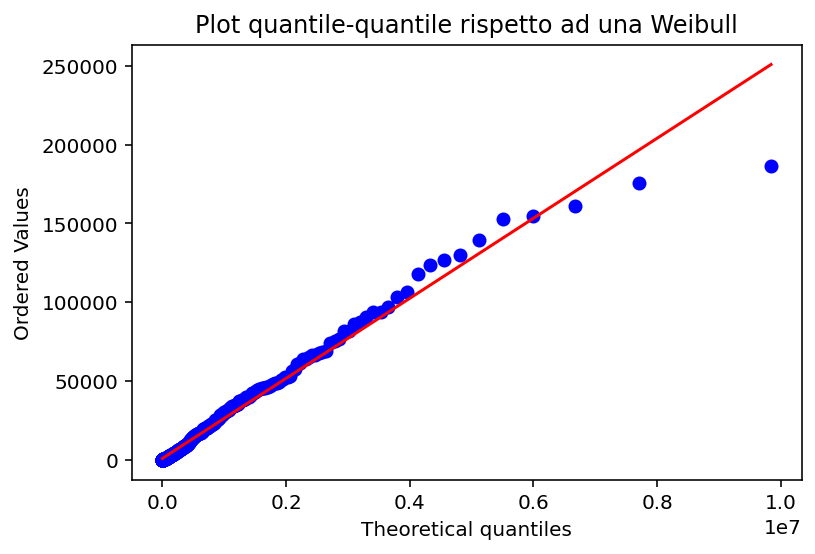

In [11]:
plotFittingDiagrams(interarrivals)

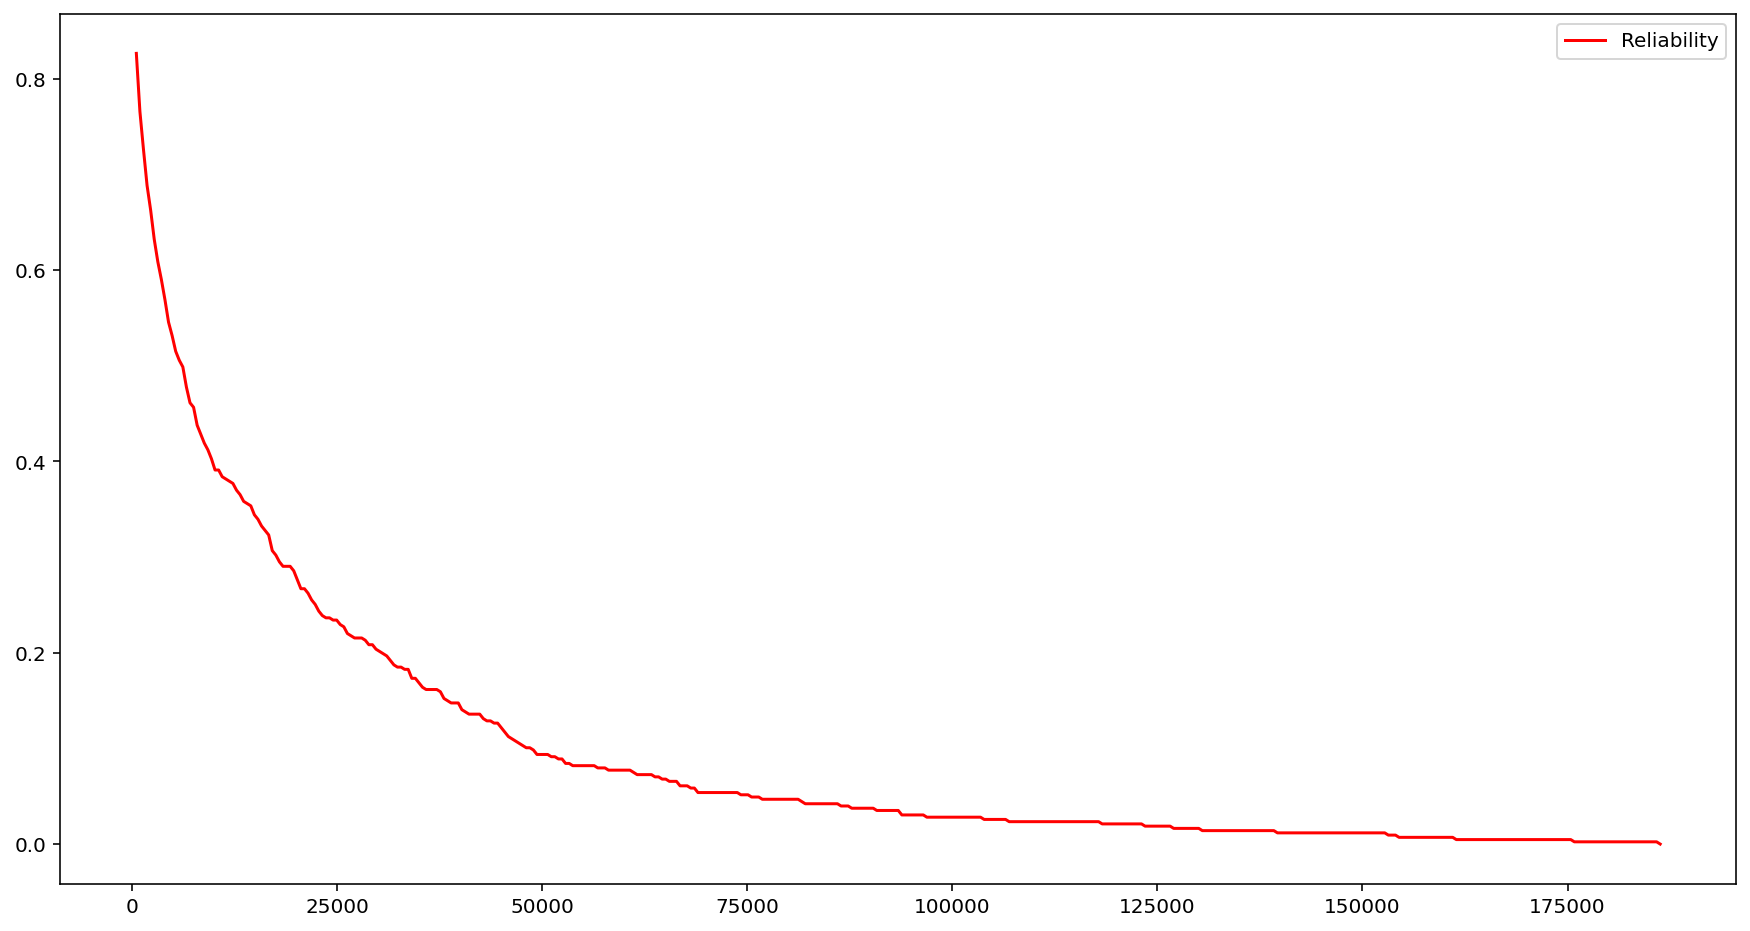

In [7]:
plotReliability(interarrivals)


In [ ]:
leader_nodes = getLeaderNodes(limit=5)

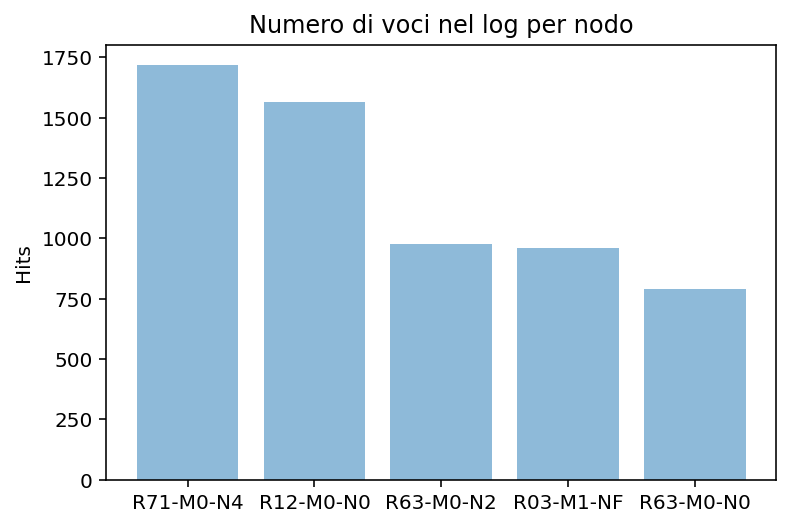

In [15]:
plotNumEntriesForNodes(leader_nodes)

In [3]:
leader_nodes = getLeaderNodes(limit=5)

In [20]:
leader_nodes

[('R71-M0-N4', 1716),
 ('R12-M0-N0', 1563),
 ('R63-M0-N2', 976),
 ('R03-M1-NF', 960),
 ('R63-M0-N0', 791)]

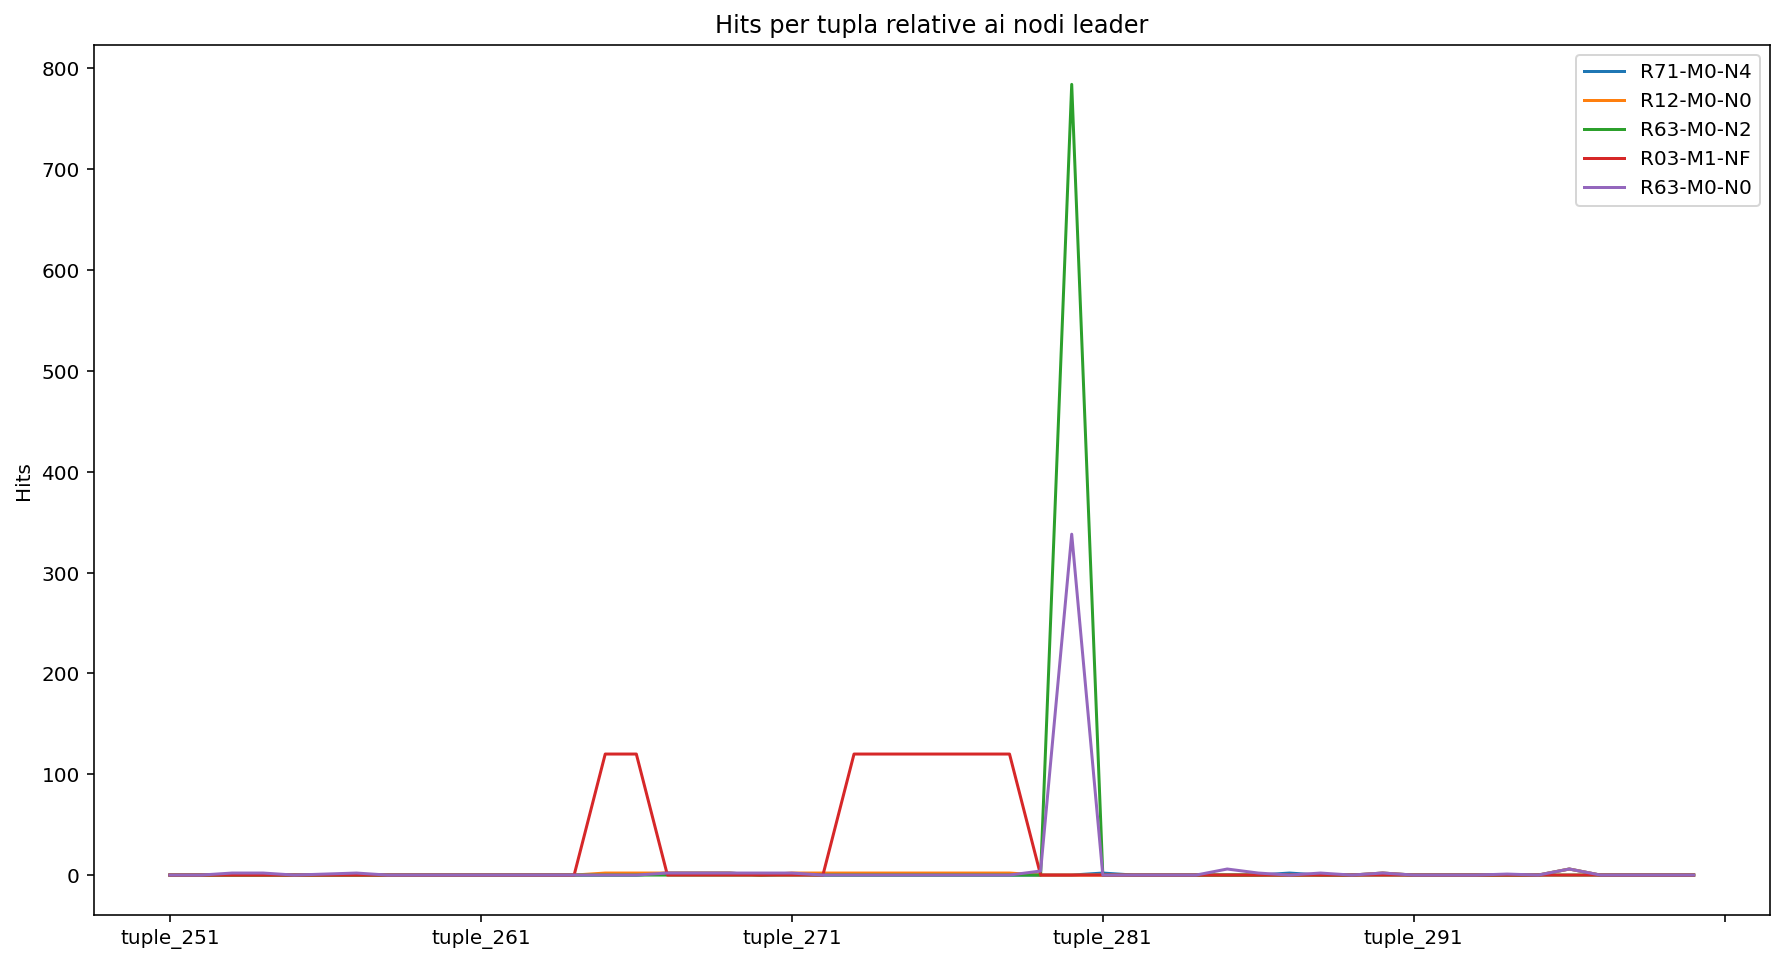

In [4]:
plotHitsForTuplesAndNodes(leader_nodes, 250, 300,10)

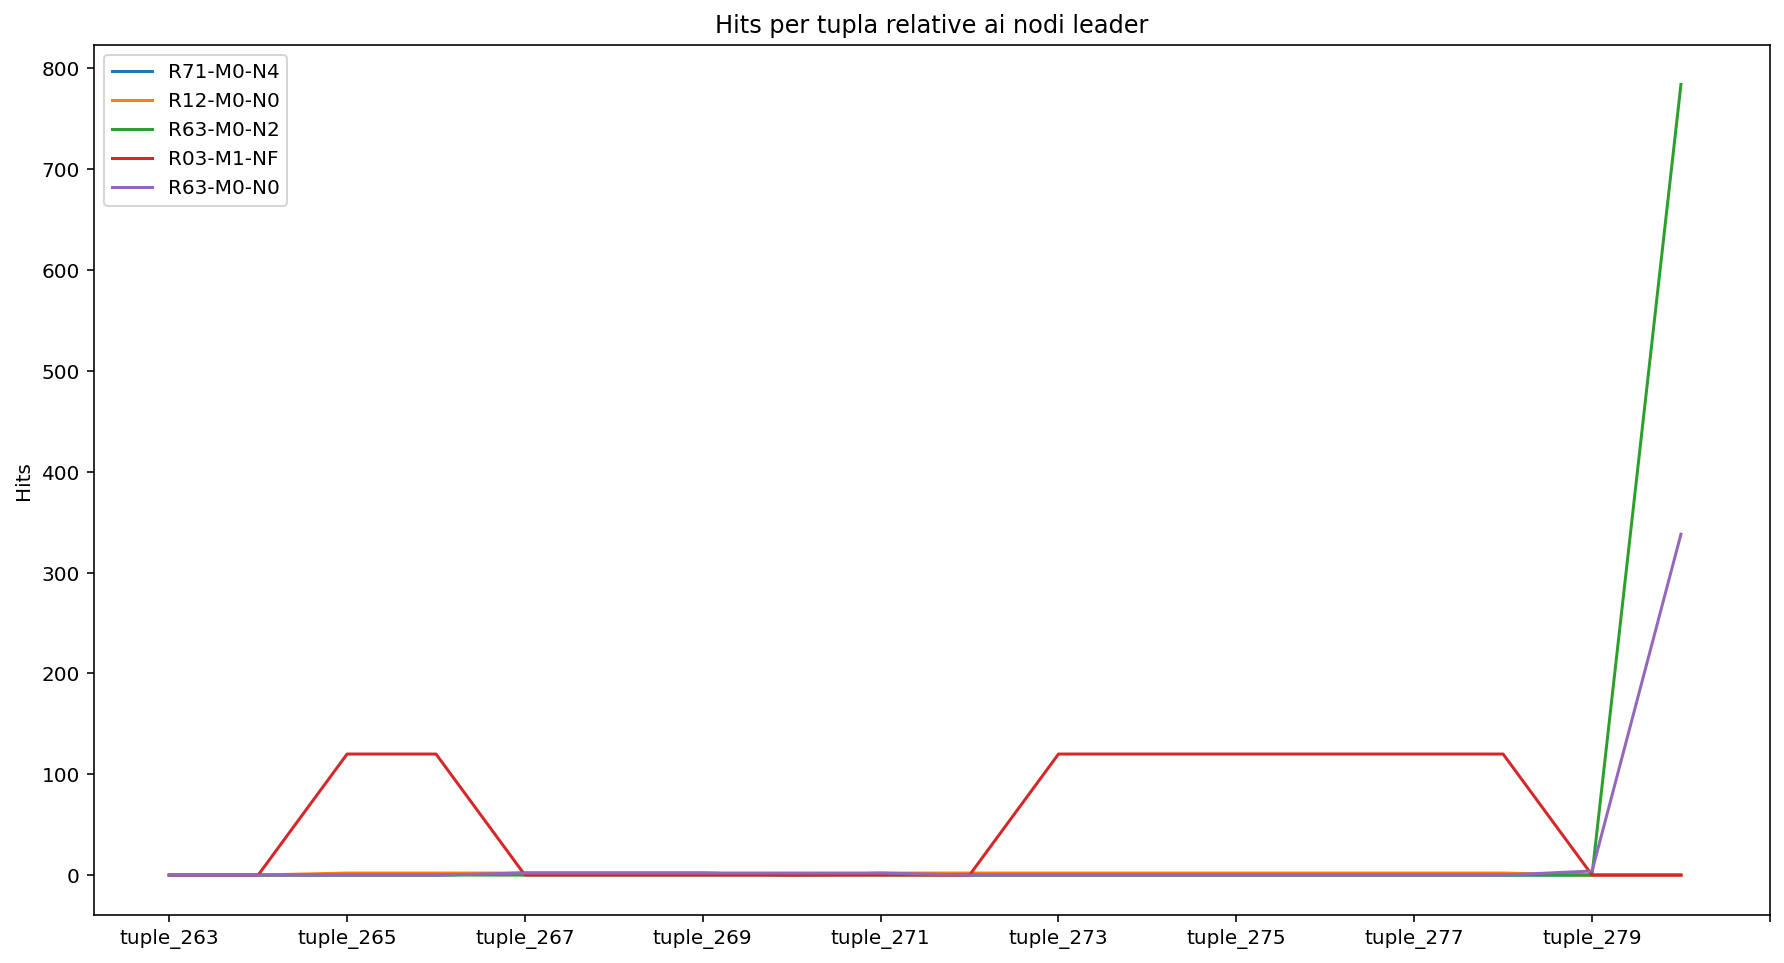

In [15]:
plotHitsForTuplesAndNodes(leader_nodes, 262, 280,2)

In [16]:
cat_series = getSeriesForKeys(['J07-U01','J18-U01','J18-U11'])

In [ ]:
cat_series

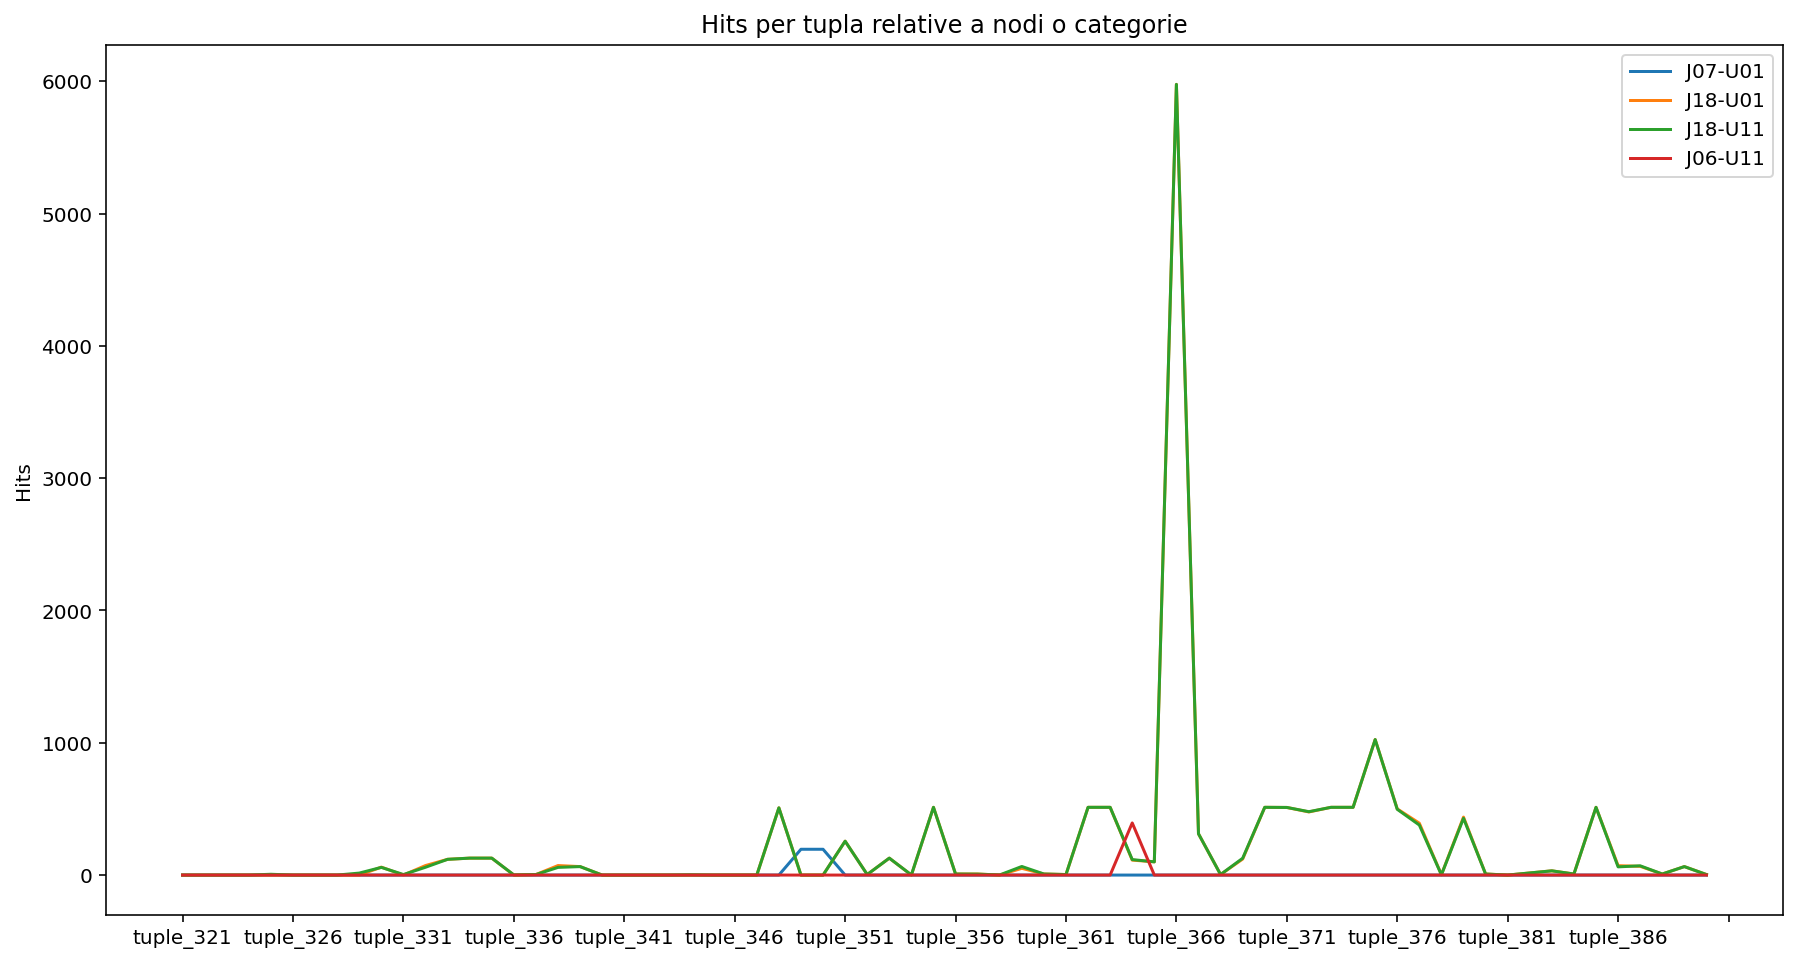

In [43]:
plotHitsForTuplesAndNodes(['J07-U01','J18-U01','J18-U11','J06-U11'], 320, 390,5)

In [9]:
series_to_compare = getSeriesForKeys(['R63-M0-N0','R63-M0-N2'])

<Figure size 1081.44x576 with 0 Axes>

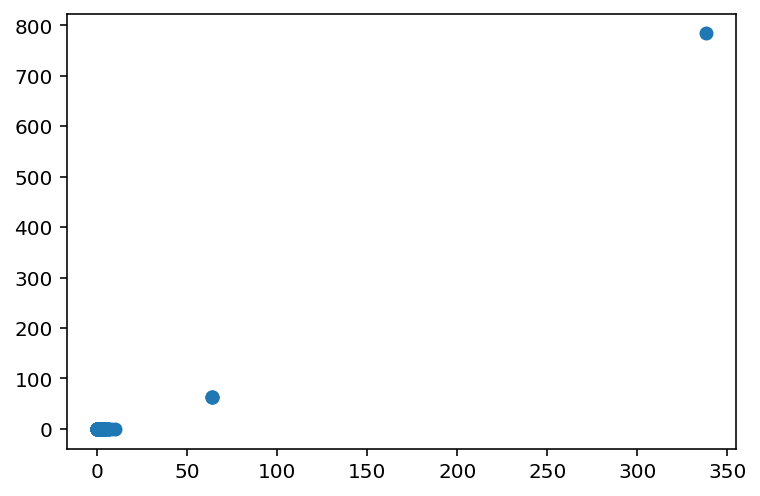

In [10]:
plotScatterForTwoSeries(series_to_compare['R63-M0-N0'], series_to_compare['R63-M0-N2'])

In [ ]:
#calcolo dei nodi più presenti nelle tuple
# TBD
nodes_dict = {}
nodes_for_tuples_arr = []

tuple_filename_prefix = 'tuple_'
for i in range(1,num_tuples+1):
    filename = tuple_filename_prefix+str(i)
    file = open(filename, "r")
    data = file.read()
    occurrences = re.findall("tg-\S{1,}", data)
    for occurr in occurrences:
        if occurr in nodes_dict:
            nodes_dict[occurr]+=1
        else:
            nodes_dict[occurr] = 1
sorted_d = dict( sorted(nodes_dict.items(), key=operator.itemgetter(1),reverse=True))
most_occurr_nodes = list(sorted_d.items())[:5]

In [ ]:
leads_in_tuples = {}
tuple_filename_prefix = 'tuple_'

for i in range(1,num_tuples):
    filename = tuple_filename_prefix+str(i)
    file = open(filename, "r")
    data = file.read()
    for lead_node in lead_nodes:
        occurrences = len(re.findall(lead_node, data))
        if lead_node in leads_in_tuples:
            leads_in_tuples[lead_node].append(occurrences)
        else:
            leads_in_tuples[lead_node] = []
        


In [ ]:
#for lead_node in lead_nodes:
#    print(lead_node)
#    print(leads_in_tuples[lead_node])

In [ ]:
def getErrorTypesInRangeForNode(start,stop,node):
    ret_dict = {}
    tuple_filename_prefix='tuple_'
    for i in range(start,stop+1):
        filename = tuple_filename_prefix+str(i)
        file = open(filename, "r")
        #print(filename)
        file_lines = file.read().splitlines()
        #print(file_lines)
        for line in file_lines:
            words = line.split()
            if words[1] == node:
                #print(words[2])
                if words[2] in ret_dict:
                    ret_dict[words[2]]+=1
                else:
                    ret_dict[words[2]] = 1
    return ret_dict        
    

In [123]:
my_string="hello python world, i'm a beginner "
print(my_string.split("world",1)[1])

, i'm a beginner 


In [ ]:
def getSerieByErrorType(error_type):
    ret_serie = []
    num_tuples = sum(1 for line in open('lenghts.txt'))
    tuple_filename_prefix='tuple_'
    for i in range(0,num_tuples):
        filename = tuple_filename_prefix+str(i+1)
        file = open(filename, "r")
        #print(filename)
        file_lines = file.read().splitlines()
        #print(file_lines)
        counter = 0
        for line in file_lines:
            words = line.split()
            if words[2] == error_type:
                counter +=1
                #print(words[2])
        ret_serie.append(counter)
    return ret_serie    

In [ ]:
DEV_error_serie = getSerieByErrorType('DEV')

In [ ]:
MEM_error_serie = getSerieByErrorType('MEM')

In [ ]:
IO_error_serie = getSerieByErrorType('I-O')

In [ ]:
NET_error_serie = getSerieByErrorType('NET')

In [ ]:
x = range(1,num_tuples+1)

In [ ]:
tuple_filename_prefix = 'tuple_'
filenames_arr=[]
for i in range(1,num_tuples+1):
    filenames_arr.append(tuple_filename_prefix+str(i))


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.plot(filenames_arr, DEV_error_serie, label = "DEV")
plt.plot(filenames_arr, MEM_error_serie, label = "MEM")
plt.plot(filenames_arr, IO_error_serie, label = "I-O")
plt.plot(filenames_arr, NET_error_serie, label = "NET")
plt.legend()
plt.show()



In [ ]:
import scipy.stats
scipy.stats.probplot(DEV_error_serie, dist=MEM_error_serie, plot=plt.figure().add_subplot(111))
plt.title("Plot quantile-quantile rispetto ad una Weibull")


In [ ]:
tg_c401 = getErrorTypesInRangeForNode(1,612,'tg-c401')

In [ ]:
tg_master = getErrorTypesInRangeForNode(1,612,'tg-master')

In [ ]:
tg_c401

In [ ]:
tg_master

In [ ]:
tg_c572 = getErrorTypesInRangeForNode(1,612,'tg-c572')

In [ ]:
tg_c572

In [ ]:
tg_s044 = getErrorTypesInRangeForNode(1,612,'tg-s044')

In [ ]:
tg_s044

In [ ]:
tg_c238 = getErrorTypesInRangeForNode(1,612,'tg-c238')

In [ ]:
tg_c238

In [ ]:
tg_c401

In [ ]:
#import matplotlib.pyplot as plt





fig, ax = plt.subplots()
ax.stackplot(tuples_arr, leads_in_tuples.values(),
             labels=leads_in_tuples.keys())
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()


In [ ]:

len(re.findall("/tg-.{1,}\s{1}", data))